# Exploratory Data Analysis on Amazon Fine Food Review 

## Summary

- **Datset Source**  
https://www.kaggle.com/snap/amazon-fine-food-reviews


- **Dataset Context**  
Dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

- **Dataset Contents**  
Reviews.csv: Pulled from the corresponding SQLite table named Reviews in database.sqlite
database.sqlite: Contains the table 'Reviews'

- **Data includes**  
    - Reviews from Oct 1999 - Oct 2012
    - 568,454 reviews
    - 256,059 users
    - 74,258 products
    - 260 users with > 50 reviews
    
- **Acknowledgements**  
See this SQLite query for a quick sample of the dataset.  

If you publish articles based on this dataset, please cite the following paper:  

J. McAuley and J. Leskovec. From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews. WWW, 2013.  


## About the Dataset 

### Field Name 
- Id - Unique Identifier
- ProductId - unique identifier for the product
- UserId - unqiue identifier for the user
- ProfileName
- HelpfulnessNumerator - number of users who found the review helpful
- HelpfulnessDenominator - number of users who indicated whether they found the review helpful
- Score - rating in the range 1 and 5, with 1 being the worse and 5 being the best
- Time - timestamp 
- Summary - summary of the review
- Text - Content of the review

### Observed facts till now   
- Missing value for column with id "Summary" and "ProfileName"
- Orginal datset contain 5-star reviews (64%) of all reviews. Followed by 4-stars(14%),  1-star (9%), 3-star (8%), and finally 2-star reviews (5%).
- We have skewed dataset
- 75% of data is belonging to positive class(Score=4,5) - **Imbalanced dataset**
- positive reviews 
    - are way more than the negative reviews.
    - are shorter
    - are found more helpful (speaks of human cognitive processing)
- Frequent reviewers
    - write longer reviews
    - more help review 


#Todo Task : Proper formating is pending


In [57]:
__author__ = "Jithin Pradeep, Madhura Dole"
__copyright__ = "Copyright (C) 2017 Jithin Pradeep, Madhura Dole"
__license__ = "MIT License"
__version__ = "1.0"

In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# for inline plot 
%matplotlib inline 

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string

program_dir = os.getcwd()
data_folder = program_dir + "\database\Reviews.csv"

In [4]:
#Let's import pandas to read the csv file.
df = pd.read_csv(data_folder)
#Verify the dataframe by printing first 2 columns from the data frame
df.head(2)

Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...

## Data set statictics and field details

In [7]:
# shape of dataframe
df.shape

# we have 568454 datapoint with 10 feature form one datapoint here

(568454, 10)

In [8]:
#More Field details
print(df.keys())
df.info()

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
df.describe()

Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09

## Frequency distribution of the scores

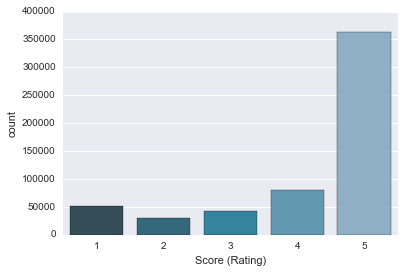

In [40]:
sns.countplot(x='Score', data=df, palette='PuBuGn_d')
plt.xlabel('Score (Rating)')
plt.show()

## Positive and negative review analysis

In [13]:
#copying the original dataframe to 'new_DF'.
new_DF = df[['UserId','HelpfulnessNumerator','HelpfulnessDenominator', 'Summary', 'Text','Score']].copy()

#Adding new features to dataframe.
new_DF["Sentiment"] = new_DF["Score"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "not defined"))
new_DF["Usefulness"] = (new_DF["HelpfulnessNumerator"]/new_DF["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

new_DF.loc[new_DF.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]
new_DF.shape

(568454, 8)

In [16]:
new_DF.describe()
new_DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 8 columns):
UserId                    568454 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
Score                     568454 non-null int64
Sentiment                 568454 non-null object
Usefulness                568454 non-null object
dtypes: int64(3), object(5)
memory usage: 34.7+ MB


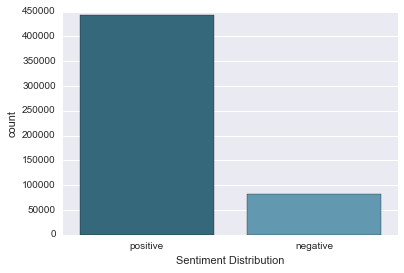

In [41]:
sns.countplot(x='Sentiment', order=["positive", "negative"], data=new_DF, palette='PuBuGn_d')
plt.xlabel('Sentiment Distribution')
plt.show()

In [18]:
# exact count 
new_DF.Sentiment.value_counts()

positive       443777
negative        82037
not defined     42640
Name: Sentiment, dtype: int64

In [26]:
pos = new_DF.loc[new_DF['Sentiment'] == 'positive']
pos = pos[0:25000]

neg = new_DF.loc[new_DF['Sentiment'] == 'negative']
neg = neg[0:25000]

In [27]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Summary"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [34]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='white')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

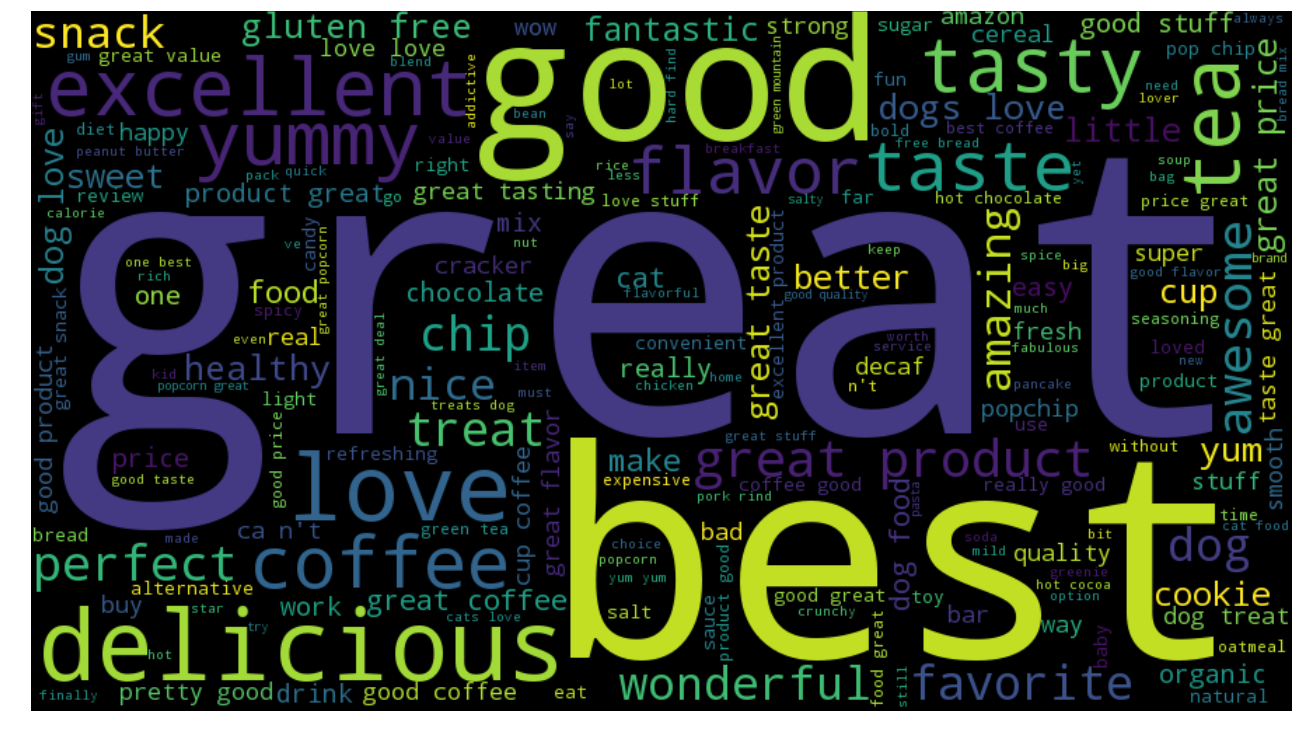

In [35]:
#Visuallizing positive words cloud
plot_Cloud(pos_wordcloud)

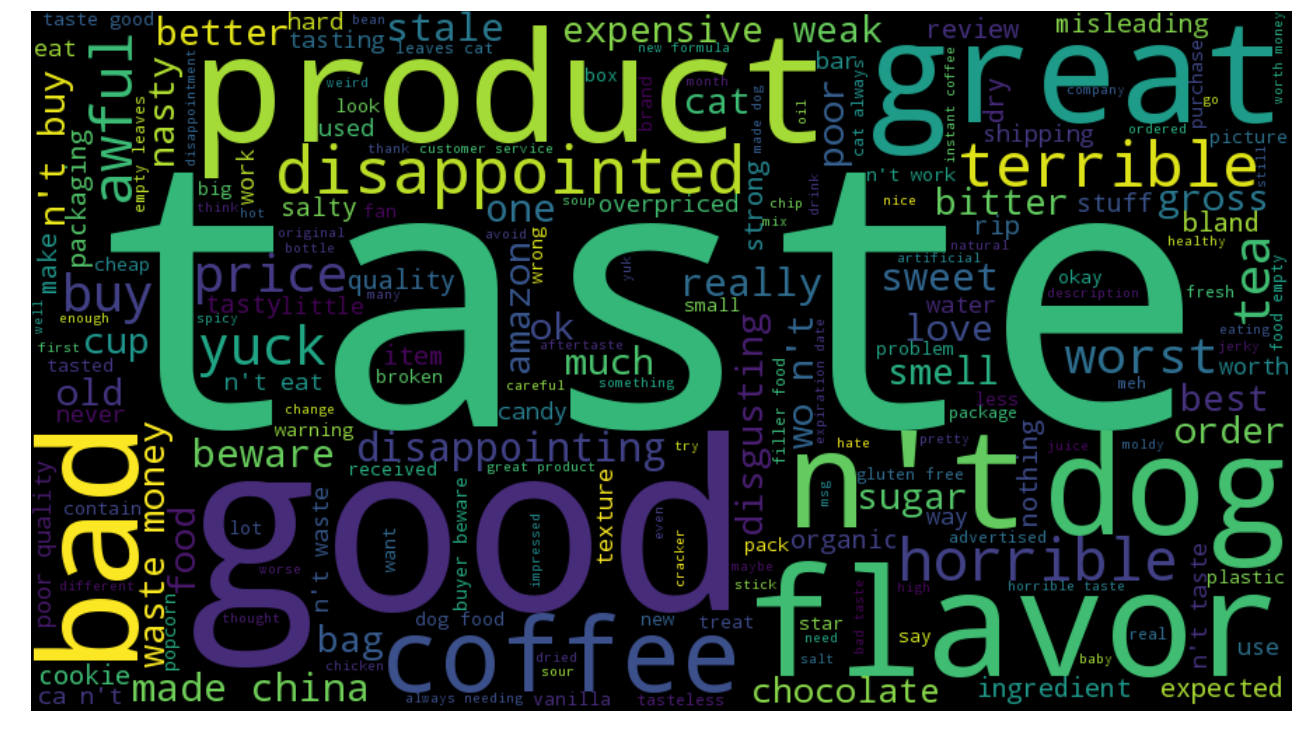

In [37]:
#Visuallizing negative words cloud
plot_Cloud(neg_wordcloud)

## HelpfulNess Analysis

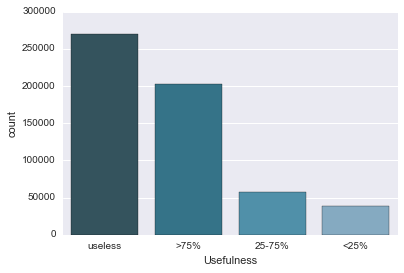

In [42]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=new_DF, palette='PuBuGn_d')
plt.xlabel('Usefulness')
plt.show()

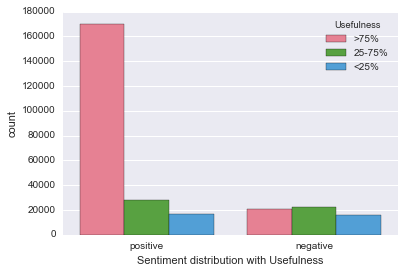

In [44]:
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=new_DF, palette='husl')
plt.xlabel('Sentiment distribution with Usefulness')
plt.show()

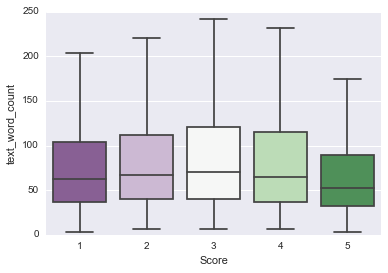

In [48]:
# Lets explore word count
new_DF["text_word_count"] = new_DF["Text"].apply(lambda text: len(text.split()))
sns.boxplot(x='Score',y='text_word_count', data=new_DF, palette='PRGn', showfliers=False)
plt.show()

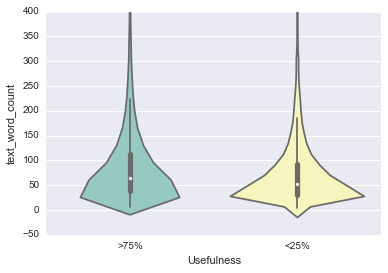

In [49]:
sns.violinplot(x='Usefulness', y='text_word_count', order=[">75%", "<25%"], \
               data=new_DF, palette='Set3')
plt.ylim(-50, 400)
plt.show()

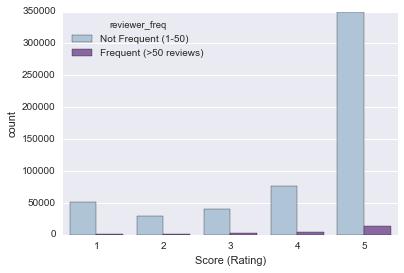

In [52]:
x = new_DF.UserId.value_counts()
x.to_dict()
new_DF["reviewer_freq"] = new_DF["UserId"].apply(lambda counts: "Frequent (>50 reviews)" \
                                                                 if x[counts]>50 else "Not Frequent (1-50)")

ax = sns.countplot(x='Score', hue='reviewer_freq', data=new_DF, palette='BuPu')
ax.set_xlabel('Score (Rating)')
plt.show()

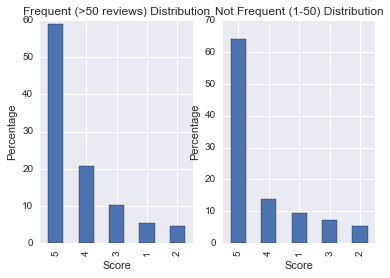

In [54]:
y = new_DF[new_DF.reviewer_freq=="Frequent (>50 reviews)"].Score.value_counts()
z = new_DF[new_DF.reviewer_freq=="Not Frequent (1-50)"].Score.value_counts()

tot_y = y.sum()

y = (y/tot_y)*100

tot_z = z.sum()

z = (z/tot_z)*100

ax1 = plt.subplot(121)
y.plot(kind="bar",ax=ax1)
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Frequent (>50 reviews) Distribution")

ax2 = plt.subplot(122)
z.plot(kind="bar",ax=ax2)
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Not Frequent (1-50) Distribution")
plt.show()

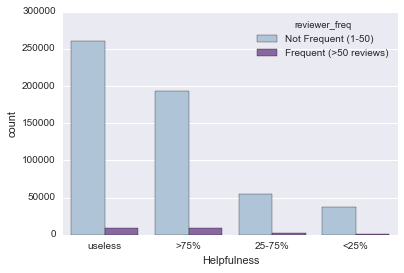

In [55]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], \
              hue='reviewer_freq', data=new_DF, palette='BuPu')
plt.xlabel('Helpfulness')
plt.show()

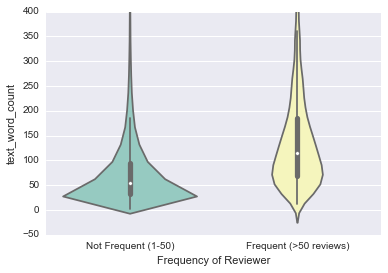

In [56]:
sns.violinplot(x='reviewer_freq', y='text_word_count',  \
               data=new_DF, palette='Set3')
plt.xlabel('Frequency of Reviewer')
plt.ylim(-50, 400)
plt.show()